In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Given excel file
df = pd.read_excel("A11-heart_disease.xlsx")
df

,age,Age in years
0,Gender,"Gender ; Male - 1, Female -0"
1,cp,Chest pain type
2,trestbps,Resting blood pressure
3,chol,cholesterol measure
4,fbs,(fasting blood sugar > 120 mg/dl) (1 = true; 0...
5,restecg,"ecg observation at resting condition, -- Val..."
6,thalch,maximum heart rate achieved
7,exang,exercise induced angina
8,oldpeak,ST depression induced by exercise relative to ...
9,slope,the slope of the peak exercise ST segment


In [2]:
#Actual data
df = pd.read_excel("A11-heart_disease.xlsx", sheet_name=1)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,normal,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,reversable defect,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,reversable defect,4


In [3]:
#Adjusting nice data
df['exang'] = df['exang'].replace({'FALSE': False, 'TRUE': True, 'TURE': True}).astype(int)
df['fbs'] = df['fbs'].astype(int)

/var/folders/l1/ppvyh4k9705bqh5_96bds3780000gn/T/ipykernel_50304/4197895626.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['exang'] = df['exang'].replace({'FALSE': False, 'TRUE': True, 'TURE': True}).astype(int)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    int64  
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    int64  
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 92.3+ KB


In [5]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [6]:
#Replacing null values with mean
df['oldpeak'] = df['oldpeak'].fillna(df['oldpeak'].mean())

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

In [8]:
df.describe()

,age,trestbps,chol,fbs,thalch,exang,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,53.791850,133.430617,201.484581,0.203744,135.957048,0.410793,0.891253,1.008811
std,9.158031,20.401608,112.097949,0.403003,26.804929,0.492249,1.055826,1.144436
min,29.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,0.000000,118.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,0.000000,138.000000,0.000000,0.800000,1.000000
75%,60.000000,144.000000,270.000000,0.000000,156.000000,1.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,1.000000,6.200000,4.000000



Value counts for sex:
sex
Male      718
Female    190
Name: count, dtype: int64


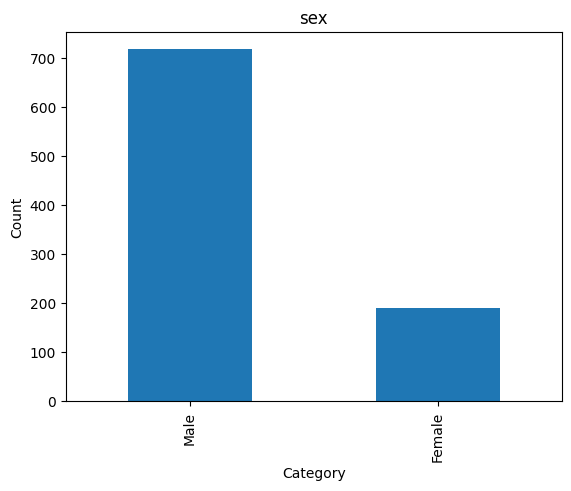


Value counts for cp:
cp
asymptomatic       495
non-anginal        203
atypical angina    165
typical angina      45
Name: count, dtype: int64


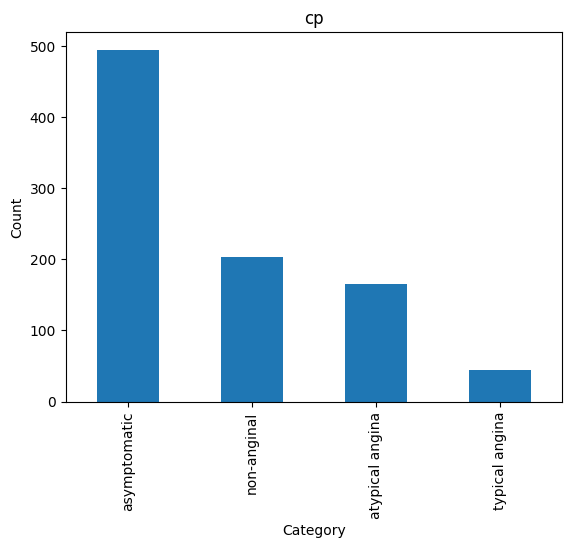


Value counts for restecg:
restecg
normal              542
lv hypertrophy      187
st-t abnormality    179
Name: count, dtype: int64


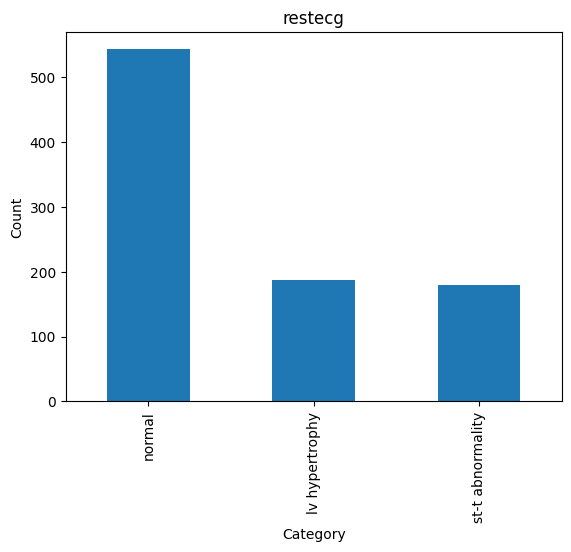


Value counts for slope:
slope
flat           453
upsloping      298
downsloping    157
Name: count, dtype: int64


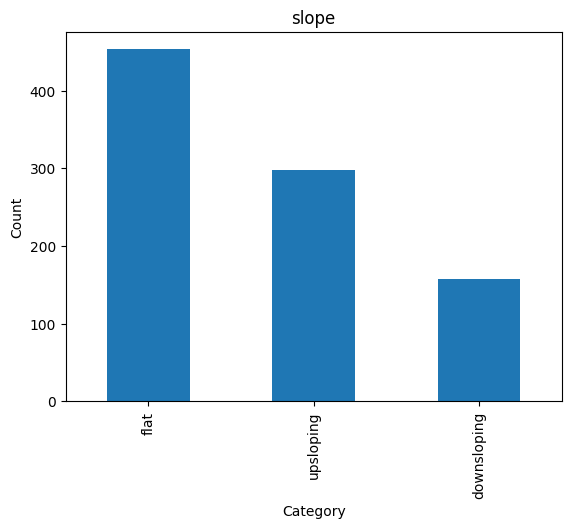


Value counts for thal:
thal
reversable defect    372
normal               339
fixed defect         197
Name: count, dtype: int64


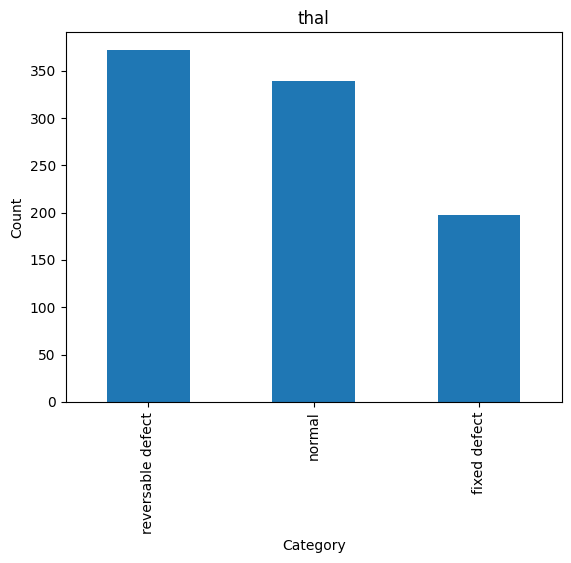

In [9]:
#categorical features
cat_cols = df.select_dtypes(include="object").columns

#box plot visualisation
for c in cat_cols:
    print(f"\nValue counts for {c}:")
    print(df[c].value_counts())
    
    df[c].value_counts().plot(kind='bar')
    plt.title(c)
    plt.xlabel("Category")
    plt.ylabel("Count")
    plt.show()

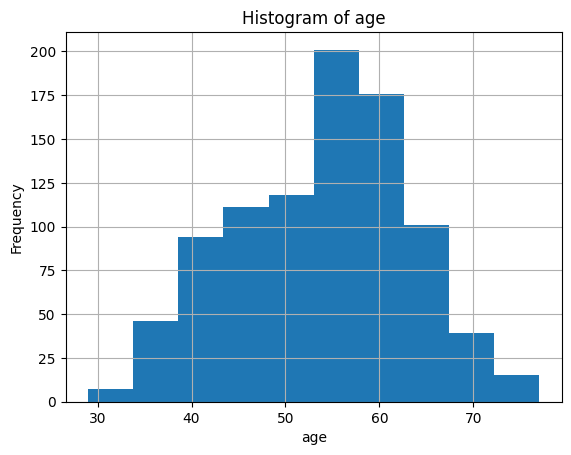

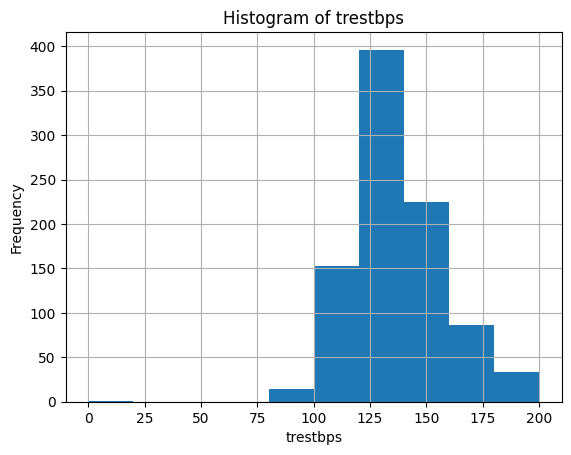

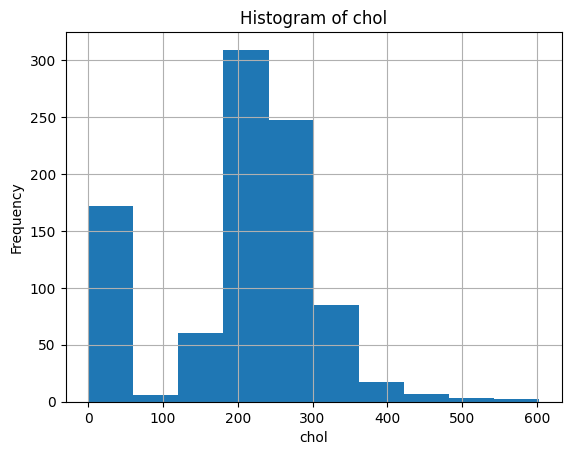

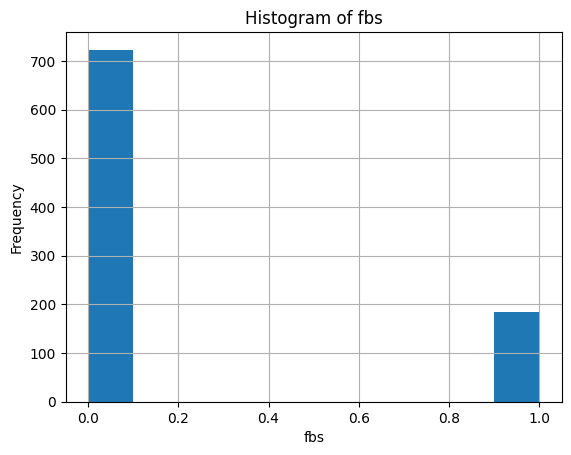

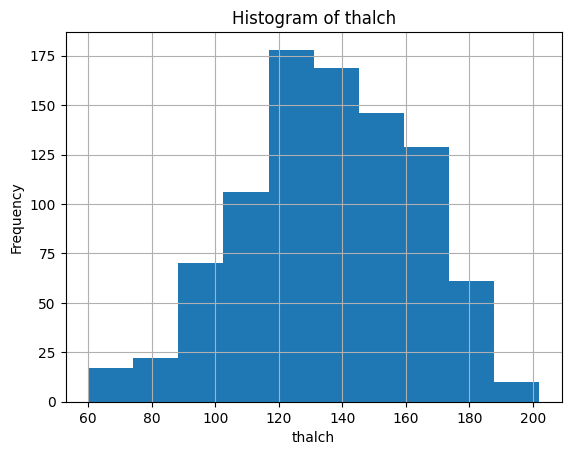

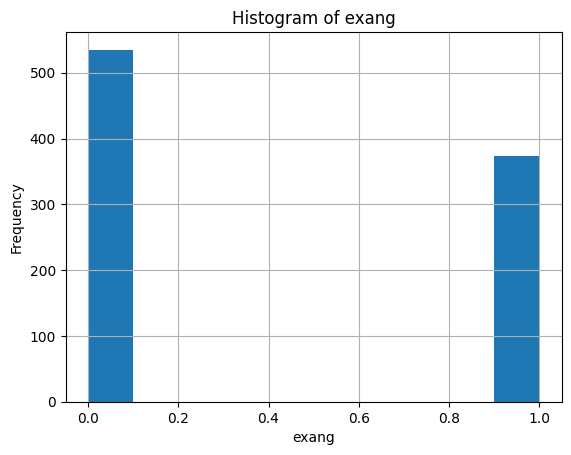

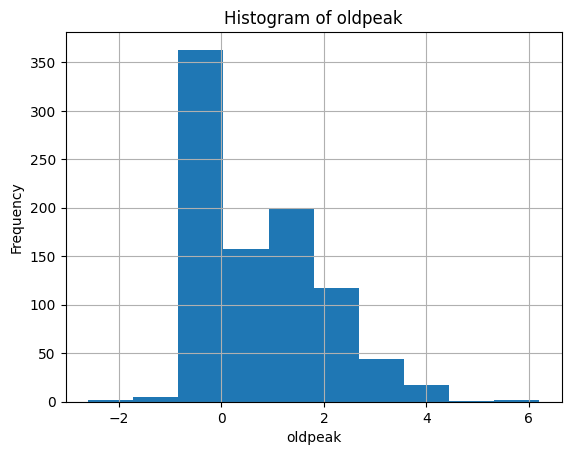

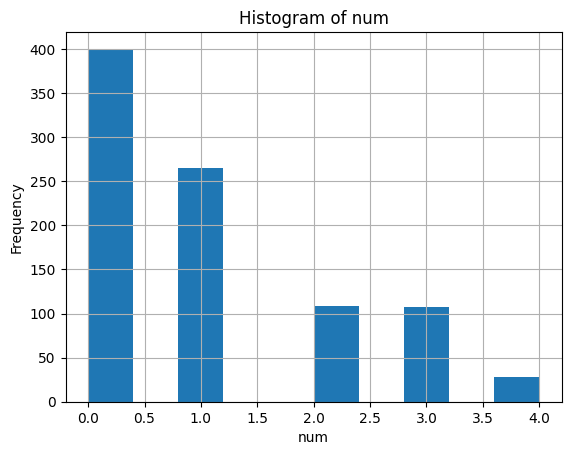

In [10]:
#numerical features
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

#histogram
for col in num_cols:
    plt.hist(df[col])  
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid()
    plt.show()


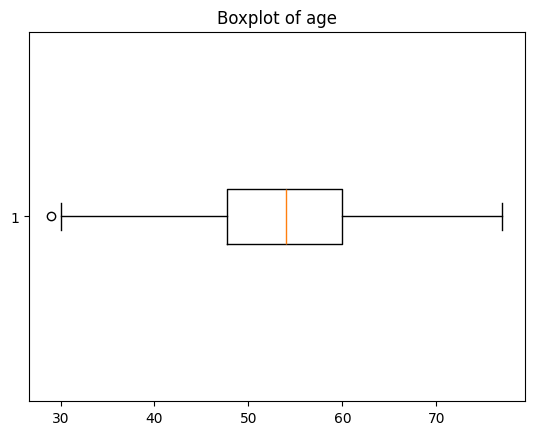

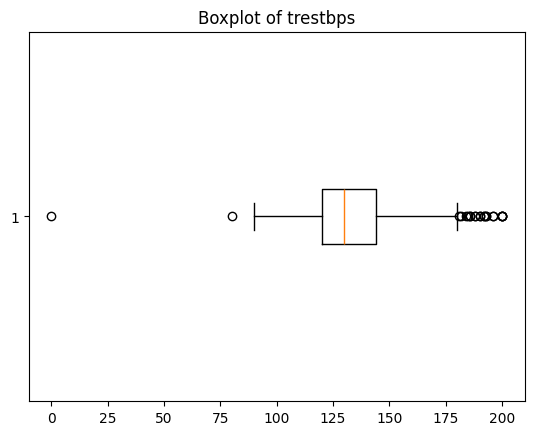

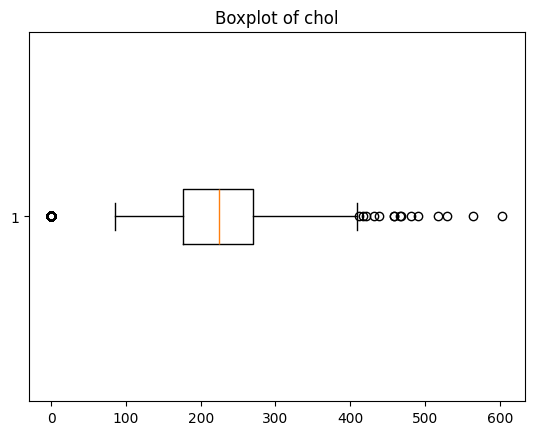

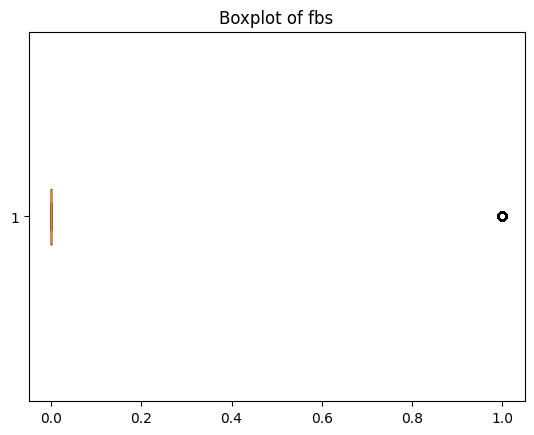

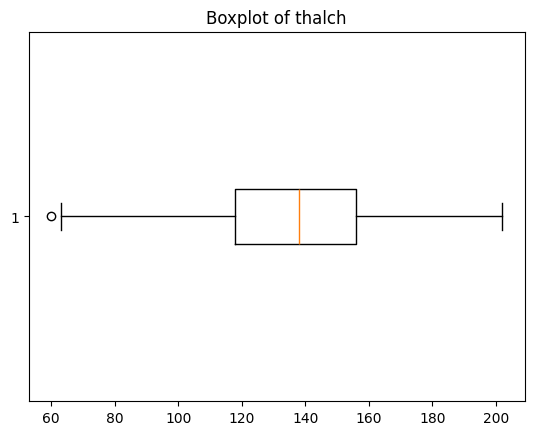

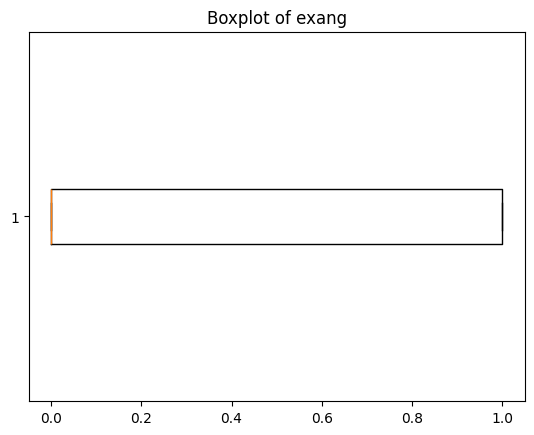

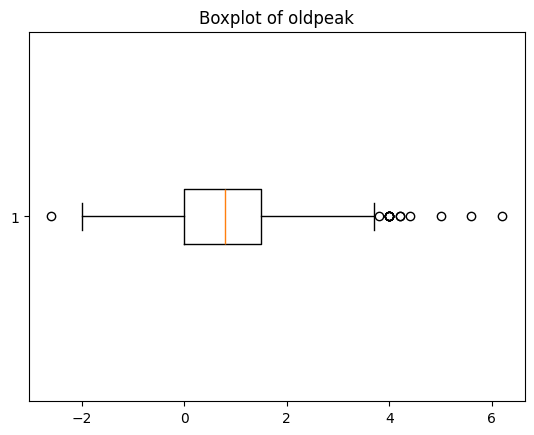

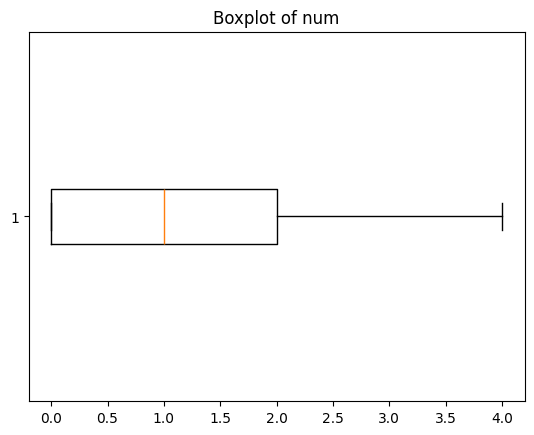

In [11]:
#box plot for finding outliers
for col in num_cols:
    plt.boxplot(df[col],vert=False)
    plt.title(f"Boxplot of {col}")
    plt.show()

In [12]:
#correlation among the numerical features

cor=df.select_dtypes(include=['int64', 'float64']).corr()
cor

,age,trestbps,chol,fbs,thalch,exang,oldpeak,num
age,1.000000,0.253999,-0.099967,0.176702,-0.328088,0.192634,0.232718,0.326493
trestbps,0.253999,1.000000,0.117488,0.111614,-0.133360,0.151984,0.152162,0.137251
chol,-0.099967,0.117488,1.000000,-0.113721,0.197907,-0.037019,0.028744,-0.238813
fbs,0.176702,0.111614,-0.113721,1.000000,-0.065428,0.027807,0.022756,0.156268
thalch,-0.328088,-0.133360,0.197907,-0.065428,1.000000,-0.349191,-0.128728,-0.323058
exang,0.192634,0.151984,-0.037019,0.027807,-0.349191,1.000000,0.369569,0.359549
oldpeak,0.232718,0.152162,0.028744,0.022756,-0.128728,0.369569,1.000000,0.416580
num,0.326493,0.137251,-0.238813,0.156268,-0.323058,0.359549,0.416580,1.000000


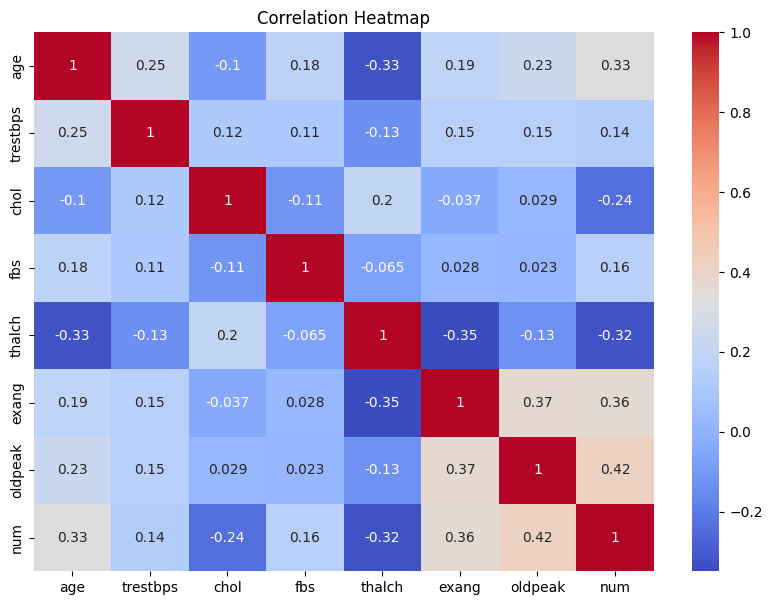

In [13]:
#correlation visualisation 
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.heatmap(cor, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [14]:
#Correlation with respective target feature 
cor.corr()['num'].abs().sort_values(ascending=False)

num         1.000000
thalch      0.754320
chol        0.692673
oldpeak     0.614012
exang       0.606656
age         0.550451
fbs         0.148748
trestbps    0.101275
Name: num, dtype: float64

In [15]:
#unique values in each feature
df.nunique()

age          49
sex           2
cp            4
trestbps     85
chol        228
fbs           2
restecg       3
thalch      122
exang         2
oldpeak      54
slope         3
thal          3
num           5
dtype: int64

In [16]:
#data transformation with respective to feature type

from sklearn.preprocessing import LabelEncoder,StandardScaler

le = LabelEncoder()
ss = StandardScaler()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

num_cols = num_cols.drop('num') # exclude target 
df[num_cols] = ss.fit_transform(df[num_cols])


In [17]:
# Splitting the data
y = df["num"]
#y = (df['num'] > 0).astype(int)
x = df.drop(columns=['num'])

trianing accuracy: 1.0
test accuracy: 0.451

 Trianing classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       319
           1       1.00      1.00      1.00       212
           2       1.00      1.00      1.00        87
           3       1.00      1.00      1.00        86
           4       1.00      1.00      1.00        22

    accuracy                           1.00       726
   macro avg       1.00      1.00      1.00       726
weighted avg       1.00      1.00      1.00       726


 Test classification report:
               precision    recall  f1-score   support

           0       0.72      0.69      0.71        80
           1       0.42      0.38      0.40        53
           2       0.12      0.14      0.13        22
           3       0.15      0.19      0.17        21
           4       0.00      0.00      0.00         6

    accuracy                           0.45       182
   macro avg       0.

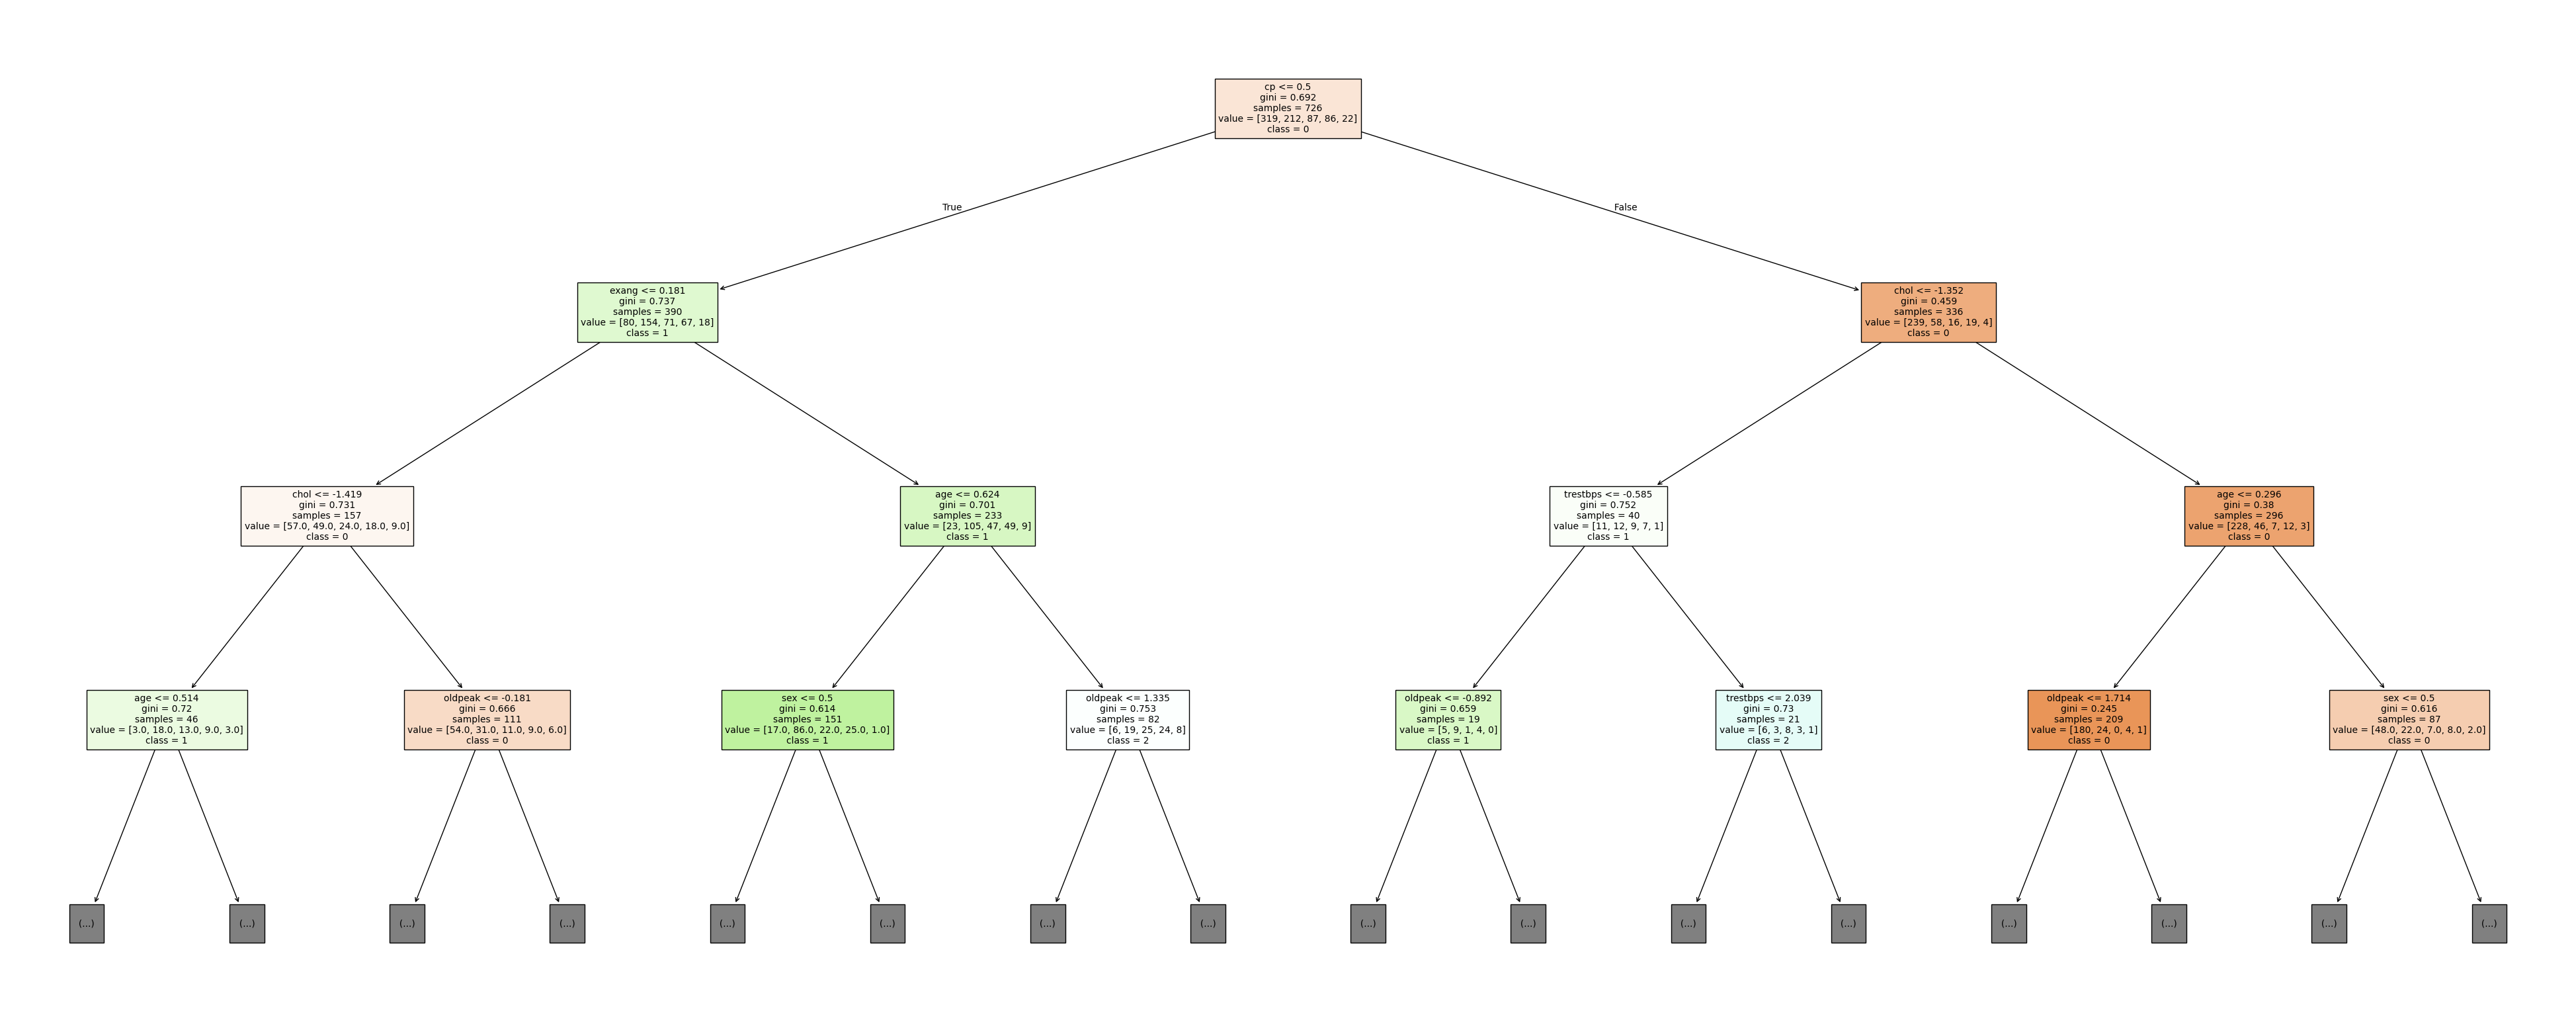

In [18]:
# data partition for model development.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state=42, stratify=y)

#decision tree classifier
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

#performance matrix for evaluation the model
from sklearn.metrics import accuracy_score,classification_report
print("trianing accuracy:", np.round(accuracy_score(y_train,y_pred_train), 3))
print("test accuracy:", np.round(accuracy_score(y_test,y_pred_test), 3))
print("\n Trianing classification report:\n", classification_report(y_train,y_pred_train))
print("\n Test classification report:\n", classification_report(y_test,y_pred_test))

# resultant tree visulazation
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

class_names = [str(c) for c in sorted(y.unique())]

plt.figure(figsize=(50,20))
plot_tree( model, filled=True, feature_names=x.columns, class_names=class_names, max_depth=3, fontsize=10)
plt.show()



In [19]:
#hyperparameters for knowing  the best parameters

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'max_depth': [None, 3, 5, 7, 10],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}
grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid,
                    cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(x_train, y_train)  

print("\nBest params:", grid.best_params_)



Best params: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [20]:
# based on best estimators/parameters
best_dt = grid.best_estimator_
y_pred_best = best_dt.predict(x_test)

print("\nTuned model accuracy:", round(accuracy_score(y_test, y_pred_best), 3))
print("\nClassification report (tuned):\n", classification_report(y_test, y_pred_best))



Tuned model accuracy: 0.5055

Classification report (tuned):
               precision    recall  f1-score   support

           0       0.67      0.84      0.74        80
           1       0.39      0.40      0.39        53
           2       0.14      0.18      0.16        22
           3       0.00      0.00      0.00        21
           4       0.00      0.00      0.00         6

    accuracy                           0.51       182
   macro avg       0.24      0.28      0.26       182
weighted avg       0.43      0.51      0.46       182



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


best_importances: 
 cp          0.562547
chol        0.176597
age         0.152926
exang       0.087281
trestbps    0.020649
sex         0.000000
fbs         0.000000
restecg     0.000000
thalch      0.000000
oldpeak     0.000000
slope       0.000000
thal        0.000000
dtype: float64


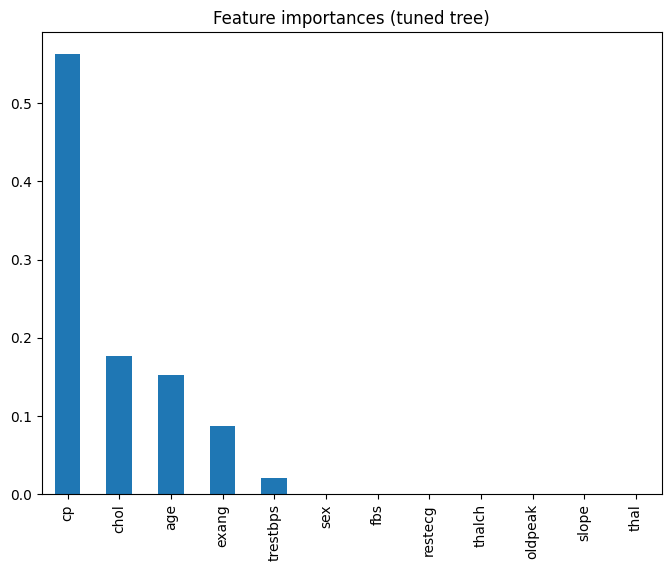

In [21]:
# important features for tuning the model
best_importances = pd.Series(best_dt.feature_importances_, index=x.columns).sort_values(ascending=False)
print("best_importances: \n",best_importances)

#imp features visualising
plt.figure(figsize=(8,6))
best_importances.plot(kind='bar')
plt.title("Feature importances (tuned tree)")
plt.show()

trianing accuracy: 0.59
test accuracy: 0.505

 Trianing classification report:
               precision    recall  f1-score   support

           0       0.69      0.88      0.78       319
           1       0.52      0.53      0.53       212
           2       0.32      0.38      0.35        87
           3       0.00      0.00      0.00        86
           4       0.00      0.00      0.00        22

    accuracy                           0.59       726
   macro avg       0.31      0.36      0.33       726
weighted avg       0.50      0.59      0.54       726


 Test classification report:
               precision    recall  f1-score   support

           0       0.67      0.84      0.74        80
           1       0.39      0.40      0.39        53
           2       0.14      0.18      0.16        22
           3       0.00      0.00      0.00        21
           4       0.00      0.00      0.00         6

    accuracy                           0.51       182
   macro avg       0

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/lib/python

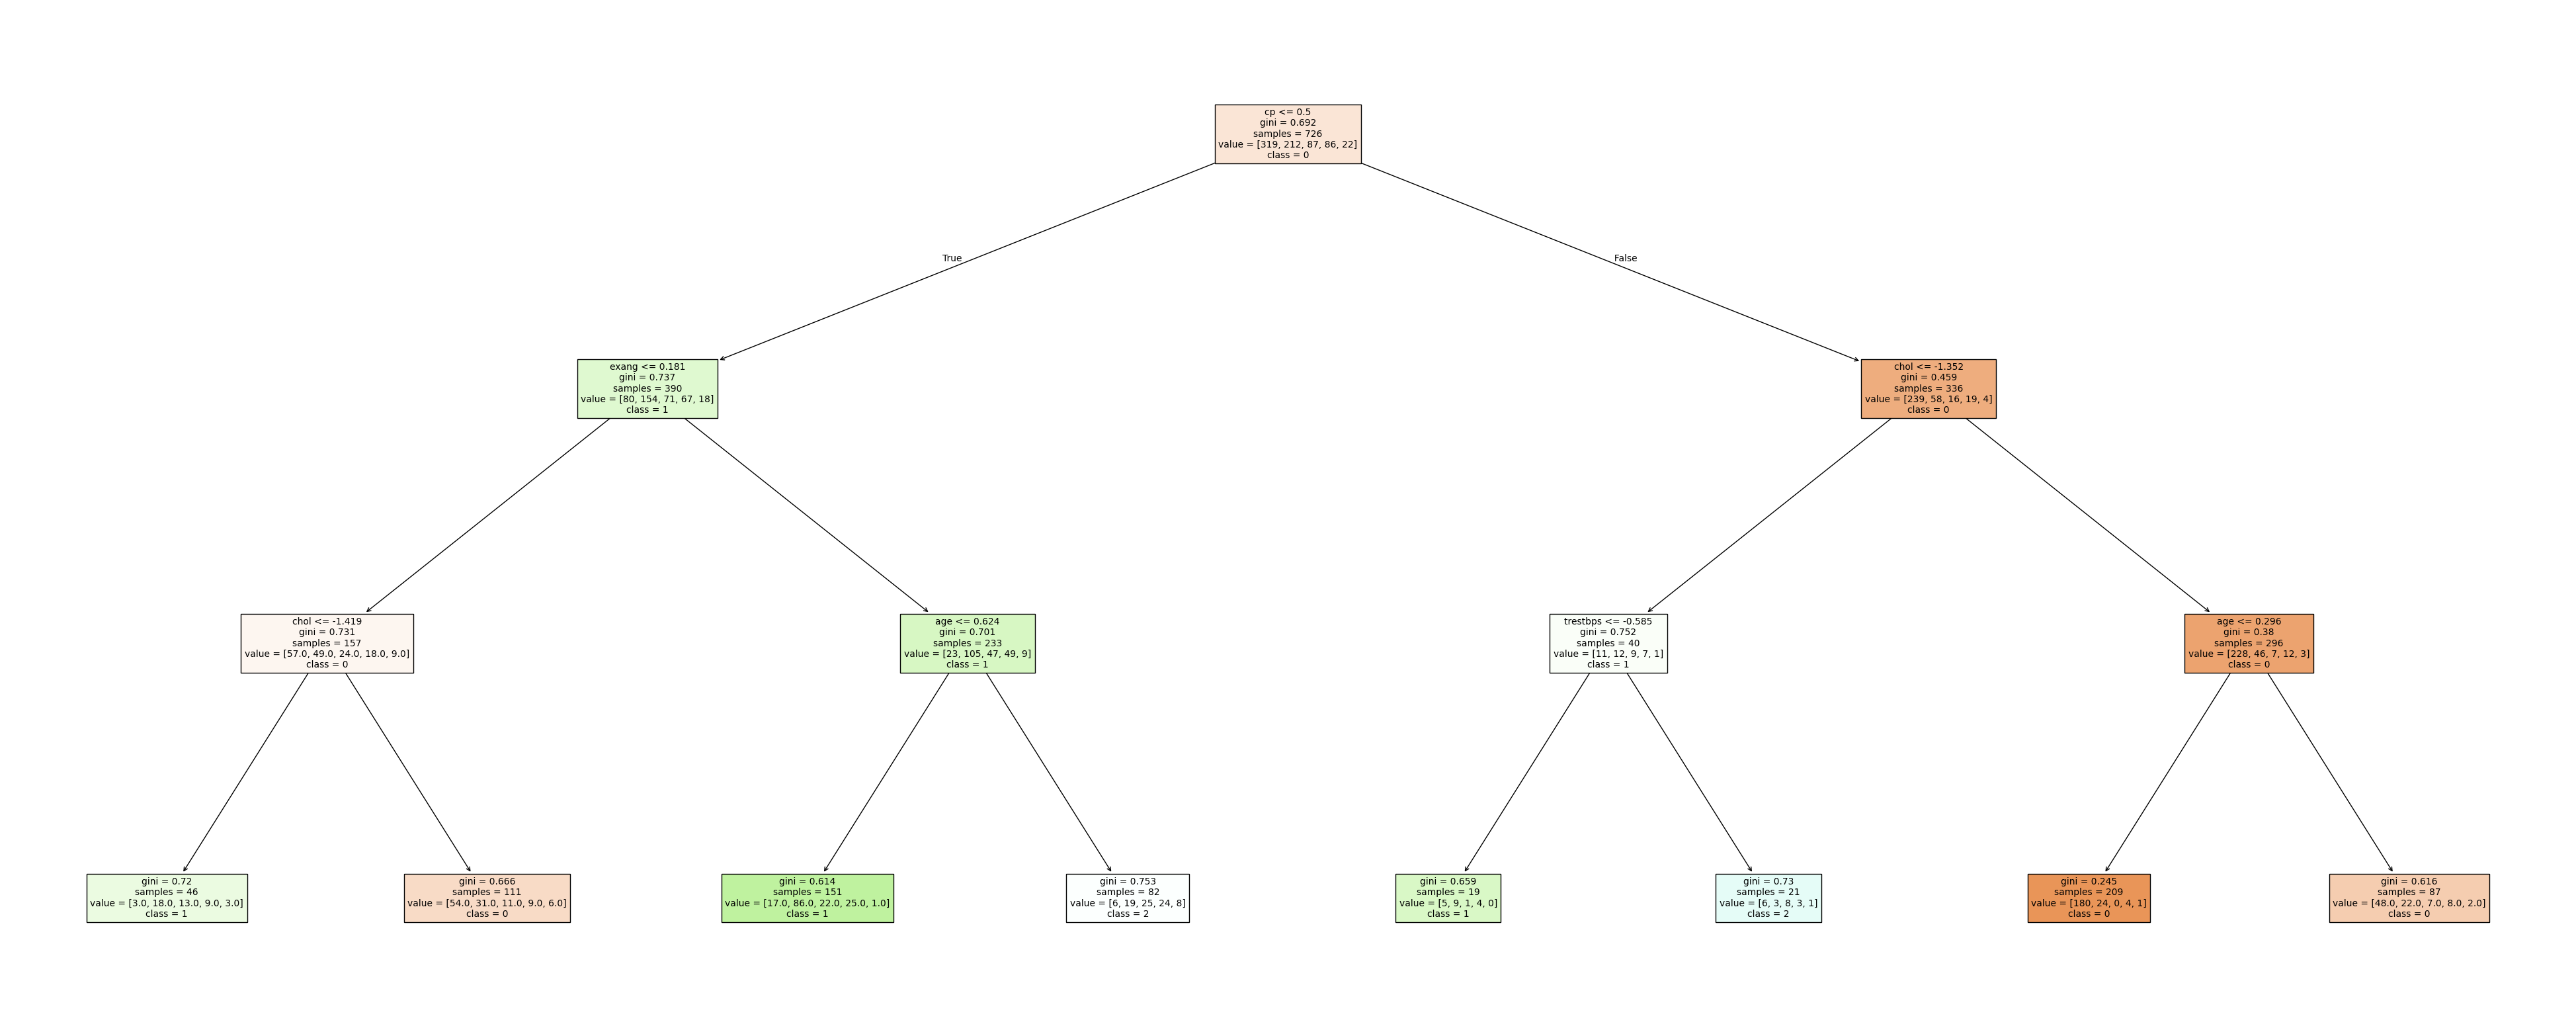

In [22]:
#based on important features 
#we are tuning the model for better accuracy

best_features = ['cp', 'chol', 'age', 'exang', 'trestbps']

x = df[best_features]
y = df['num']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state=42, stratify=y)

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='gini', max_depth=3) #based on best parameters , we choose criteria gini and max depth 3.
model.fit(x_train, y_train)

y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

from sklearn.metrics import accuracy_score,classification_report
print("trianing accuracy:", np.round(accuracy_score(y_train,y_pred_train), 3))
print("test accuracy:", np.round(accuracy_score(y_test,y_pred_test), 3))
print("\n Trianing classification report:\n", classification_report(y_train,y_pred_train))
print("\n Test classification report:\n", classification_report(y_test,y_pred_test))

# graph visulazation
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

class_names = [str(c) for c in sorted(y.unique())]

plt.figure(figsize=(50,20))
plot_tree( model, filled=True, feature_names=x.columns, class_names=class_names, max_depth=3, fontsize=10)
plt.show()



In [30]:
# Model performance actually dropped badly....
# So will try other cross validation method ...

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit, cross_val_score

dt = DecisionTreeClassifier(random_state=42)
#dt = DecisionTreeClassifier(class_weight="balanced",random_state=42)

params = {
    "criterion": ["gini", "entropy"],
    "max_depth": [3, 5, 7, 10, None],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 4, 8],
}

grid = GridSearchCV(dt, params, cv=ShuffleSplit(n_splits = 50,test_size=0.3), scoring='accuracy')
grid.fit(x_train, y_train)

print("\nBest Score from CV:", grid.best_score_)
print("\nBest Params:", grid.best_params_)

best_dt = grid.best_estimator_
y_pred = best_dt.predict(x_test)

print("\nTrain Accuracy:", accuracy_score(y_train, best_dt.predict(x_train)))
print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:", classification_report(y_test, y_pred))





Best Score from CV: 0.5577981651376147

Best Params: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 8, 'min_samples_split': 2}

Train Accuracy: 0.5895316804407713

Test Accuracy: 0.5054945054945055

Classification Report:               precision    recall  f1-score   support

           0       0.67      0.84      0.74        80
           1       0.39      0.40      0.39        53
           2       0.14      0.18      0.16        22
           3       0.00      0.00      0.00        21
           4       0.00      0.00      0.00         6

    accuracy                           0.51       182
   macro avg       0.24      0.28      0.26       182
weighted avg       0.43      0.51      0.46       182



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])



Best Decision Tree Model:
 DecisionTreeClassifier(max_depth=3, min_samples_leaf=8, random_state=42)


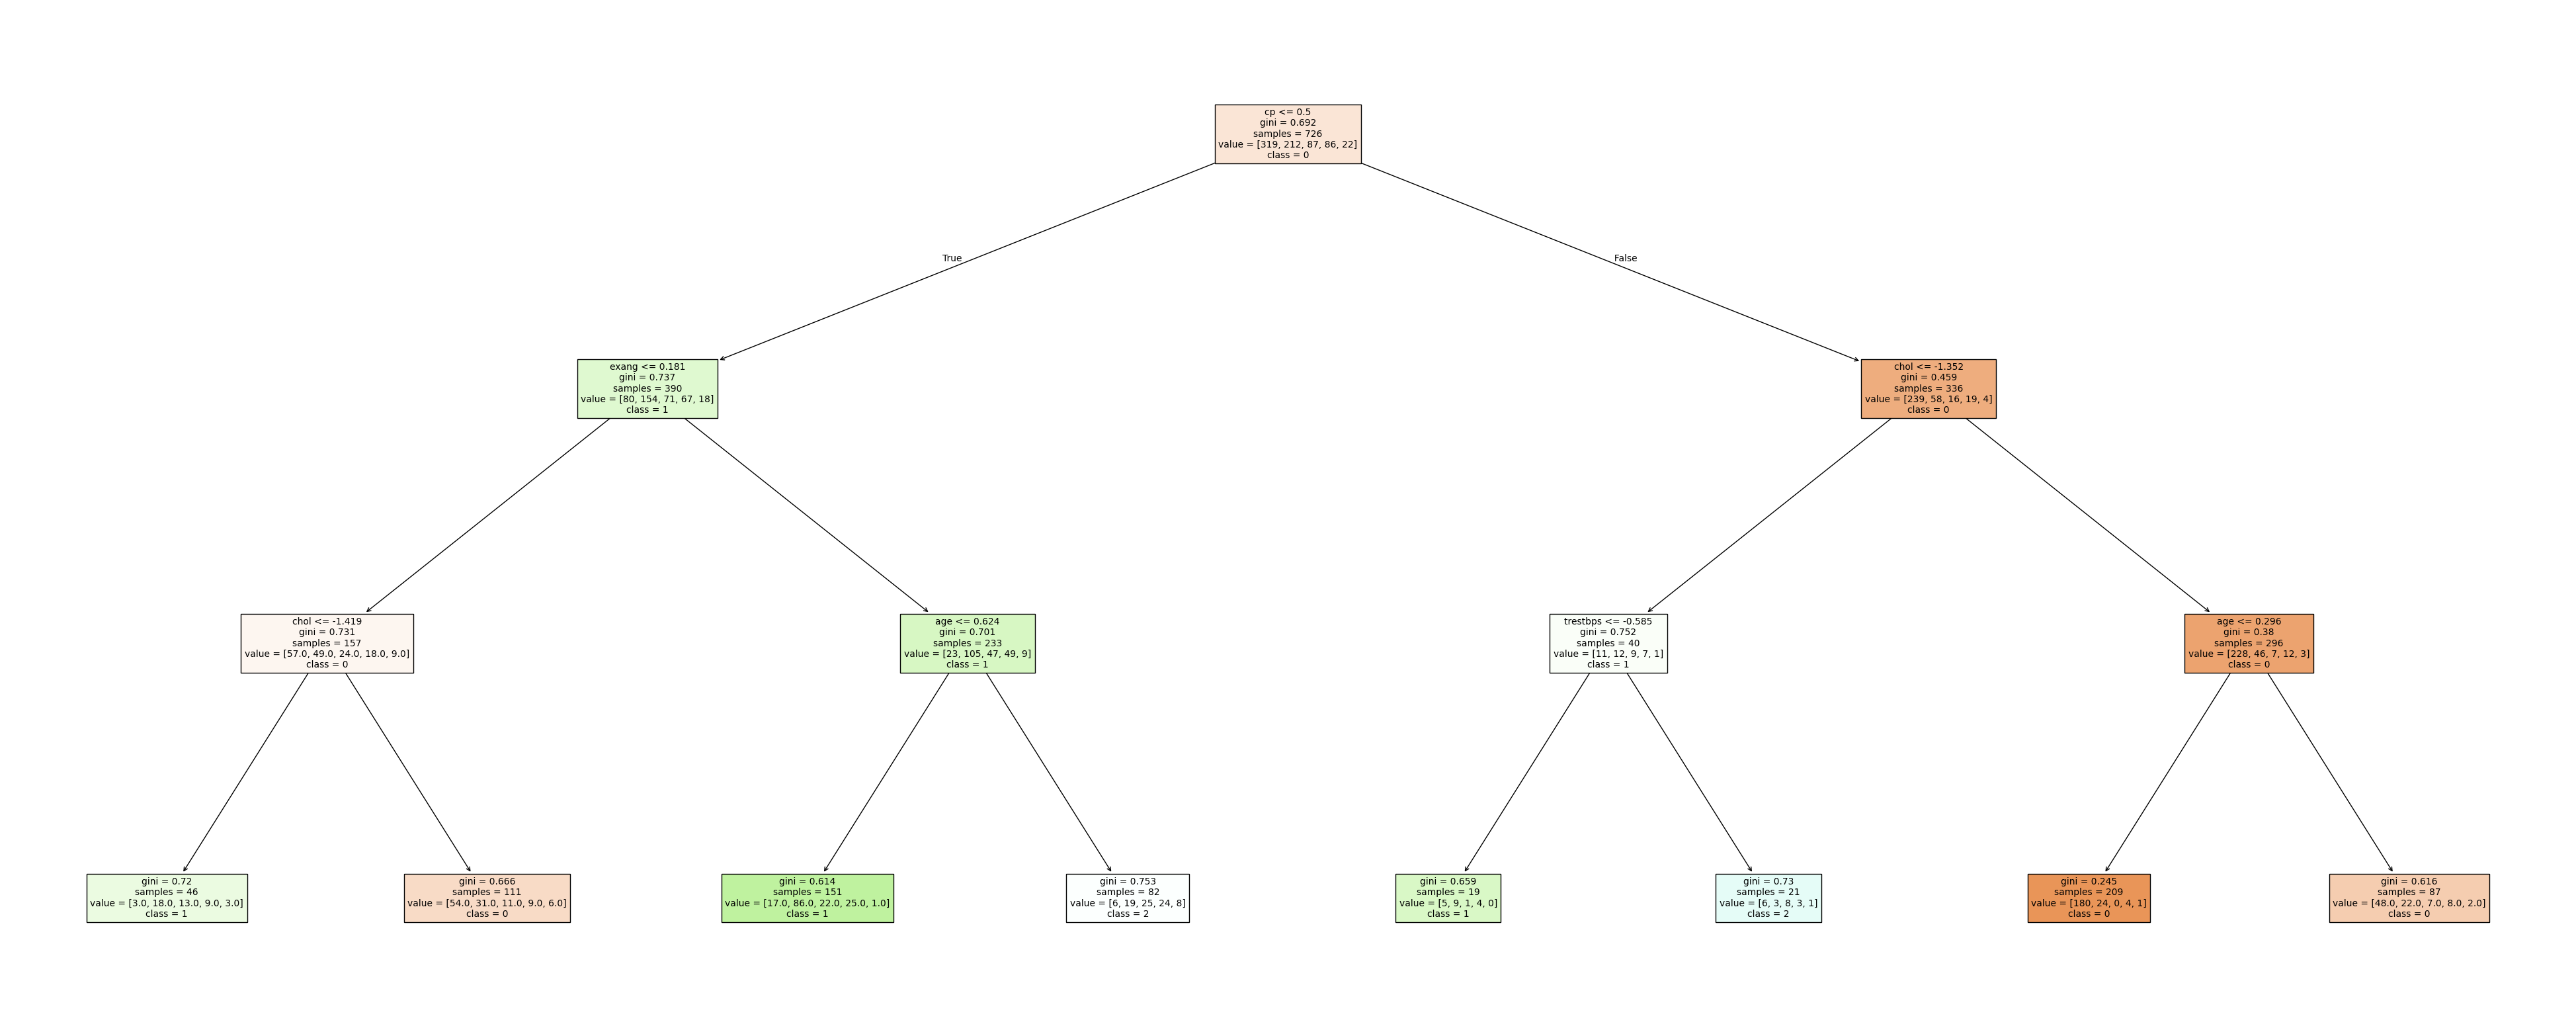

In [31]:
print("\nBest Decision Tree Model:\n", best_dt)

plt.figure(figsize=(50,20))
plot_tree(best_dt, filled=True, feature_names=x.columns, class_names=class_names, fontsize=10)
plt.show()


In [ ]:
"""
The Decision Tree model showed moderate accuracy because the target classes are
imbalanced and difficult to separate. After tuning and feature selection, the improvement was minimal. 
Overall, Decision Trees alone are not sufficient for this
dataset, and advanced ensemble models may give better results.

"""

In [ ]:
"""
Interview Questions & Answers:


Q. What are some common hyperparameters of decision tree models, 
and how do they affect the model's performance?

Decision Tree hyperparameters control the structure of the tree and 
help prevent overfitting.

max_depth –> Controls how deep the tree can grow 
             Higher depth may overfit, lower depth may underfit

min_samples_split –> Minimum samples needed to split a node
                     Higher value → simpler tree

min_samples_leaf –> Minimum samples in leaf nodes 
                    Prevents tiny, overfitted leaves

criterion (Gini/Entropy) –> Measures impurity to choose the best split

By tuning these hyperparameters, we can improve model accuracy and 
achieve a good balance between overfitting and underfitting.


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Q. What is the difference between Label Encoding and One-Hot Encoding?

Label Encoding: Converts categories into numbers (0, 1, 2…)
➝ Best for ordered categories (ordinal data)

One-Hot Encoding: Creates separate binary columns for each category
➝ Best for unordered categories (nominal data)




"""
